### FP2 XGBoost code

Rohit Srivastava 12220079   
Teja Bonthalakoti 12210035  
Arpit Agarwal 12220065  
Jasleen Kaur 12220076  

In [1]:
import pandas as pd

# Loading dataset
data = pd.read_csv('POSOCO_data.csv')

# Renaming 'yyyymmdd' to 'Date'
data = data.rename(columns={'yyyymmdd': 'Date'})

# Converting 'Date' to datetime and filtering the dataset for dates from 20200101 onwards
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
filtered_data = data.loc[data['Date'] >= pd.to_datetime('20200101')]



In [2]:
columns_to_retain = [
    'Date', 'India: EnergyMet', 'India: HydroGen', 'India: WindGen', 'India: SolarGen',
    'India: Thermal', 'India: Coal', 'India: Lignite', 'India: Nuclear', 'India: Gas', 'India: RES'
]
columns_renamed = {
    'India: EnergyMet': 'EnergyMet', 'India: HydroGen': 'HydroGen', 'India: WindGen': 'WindGen',
    'India: SolarGen': 'SolarGen', 'India: Thermal': 'Thermal', 'India: Coal': 'Coal',
    'India: Lignite': 'Lignite', 'India: Nuclear': 'Nuclear', 'India: Gas': 'Gas', 'India: RES': 'RES'
}
filtered_data = filtered_data[columns_to_retain].rename(columns=columns_renamed)

# Display the first few rows to verify the changes
filtered_data.head()

,Date,EnergyMet,HydroGen,WindGen,SolarGen,Thermal,Coal,Lignite,Nuclear,Gas,RES
2555,2020-01-01,3380.0,280.0,123.0,111.0,NaN,2571.0,78.0,110.0,106.0,320.0
2556,2020-01-02,3383.0,298.0,91.0,109.0,NaN,2601.0,81.0,110.0,104.0,287.0
2557,2020-01-03,3390.0,295.0,64.0,118.0,NaN,2627.0,86.0,101.0,106.0,267.0
2558,2020-01-04,3388.0,299.0,53.0,122.0,NaN,2680.0,81.0,101.0,107.0,211.0
2559,2020-01-05,3271.0,273.0,91.0,112.0,NaN,2531.0,84.0,97.0,96.0,282.0


In [3]:
#Thermal has many NaN values

In [4]:
filtered_data.describe()

,EnergyMet,HydroGen,WindGen,SolarGen,Thermal,Coal,Lignite,Nuclear,Gas,RES
count,1414.000000,1414.000000,1414.000000,1414.000000,149.0,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,3914.077129,454.859537,183.295564,212.873882,0.0,2884.733362,79.710347,116.383015,93.802696,451.547868
std,469.492119,177.205911,115.781020,62.386371,0.0,465.245976,14.697911,17.087708,35.499048,132.347395
min,2592.000000,215.000000,22.000000,87.000000,0.0,1727.000000,42.000000,65.000000,36.000000,211.000000
25%,3595.250000,294.000000,96.000000,160.250000,0.0,2558.000000,70.000000,105.000000,62.000000,348.000000
50%,3870.000000,403.000000,141.000000,200.000000,0.0,2844.000000,79.000000,116.000000,89.460000,423.000000
75%,4263.675000,621.750000,249.060000,264.000000,0.0,3244.000000,88.240000,129.000000,120.000000,528.000000
max,5223.940000,877.000000,610.520000,351.200000,0.0,3988.000000,144.000000,159.200000,204.530000,895.040000


In [5]:
# Drop the 'Thermal' column from the dataset
filtered_data = filtered_data.drop(columns=['Thermal'])

In [6]:
# Check for missing values in the dataset before applying any imputation
missing_values = filtered_data.isnull().sum()
missing_values[missing_values > 0]

Coal       1
Lignite    1
Nuclear    1
Gas        1
RES        1
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)


numerical_columns = filtered_data.columns.drop('Date')
numerical_data = filtered_data[numerical_columns]


imputed_data = imputer.fit_transform(numerical_data)


imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns, index=numerical_data.index)


imputed_df['Date'] = filtered_data['Date']


imputed_df = imputed_df[['Date'] + [col for col in imputed_df.columns if col != 'Date']]


imputed_df.head()

,Date,EnergyMet,HydroGen,WindGen,SolarGen,Coal,Lignite,Nuclear,Gas,RES
2555,2020-01-01,3380.0,280.0,123.0,111.0,2571.0,78.0,110.0,106.0,320.0
2556,2020-01-02,3383.0,298.0,91.0,109.0,2601.0,81.0,110.0,104.0,287.0
2557,2020-01-03,3390.0,295.0,64.0,118.0,2627.0,86.0,101.0,106.0,267.0
2558,2020-01-04,3388.0,299.0,53.0,122.0,2680.0,81.0,101.0,107.0,211.0
2559,2020-01-05,3271.0,273.0,91.0,112.0,2531.0,84.0,97.0,96.0,282.0


In [8]:
# Check for missing values in the dataset after applying any imputation
missing_values = imputed_df.isnull().sum()
missing_values

Date         0
EnergyMet    0
HydroGen     0
WindGen      0
SolarGen     0
Coal         0
Lignite      0
Nuclear      0
Gas          0
RES          0
dtype: int64

In [9]:
imputed_df.to_csv("Final_POSOCO.csv", index=False, date_format='%Y-%m-%d')

In [10]:
#EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# EDA: Summary Statistics
summary_statistics = imputed_df.describe()

summary_statistics

,EnergyMet,HydroGen,WindGen,SolarGen,Coal,Lignite,Nuclear,Gas,RES
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,3914.077129,454.859537,183.295564,212.873882,2884.483197,79.693720,116.372277,93.835368,451.486661
std,469.492119,177.205911,115.781020,62.386371,465.176442,14.706005,17.086432,35.507744,132.320574
min,2592.000000,215.000000,22.000000,87.000000,1727.000000,42.000000,65.000000,36.000000,211.000000
25%,3595.250000,294.000000,96.000000,160.250000,2558.000000,70.000000,105.000000,62.000000,348.000000
50%,3870.000000,403.000000,141.000000,200.000000,2843.500000,79.000000,116.000000,89.580000,423.000000
75%,4263.675000,621.750000,249.060000,264.000000,3243.250000,88.180000,129.000000,120.000000,527.775000
max,5223.940000,877.000000,610.520000,351.200000,3988.000000,144.000000,159.200000,204.530000,895.040000


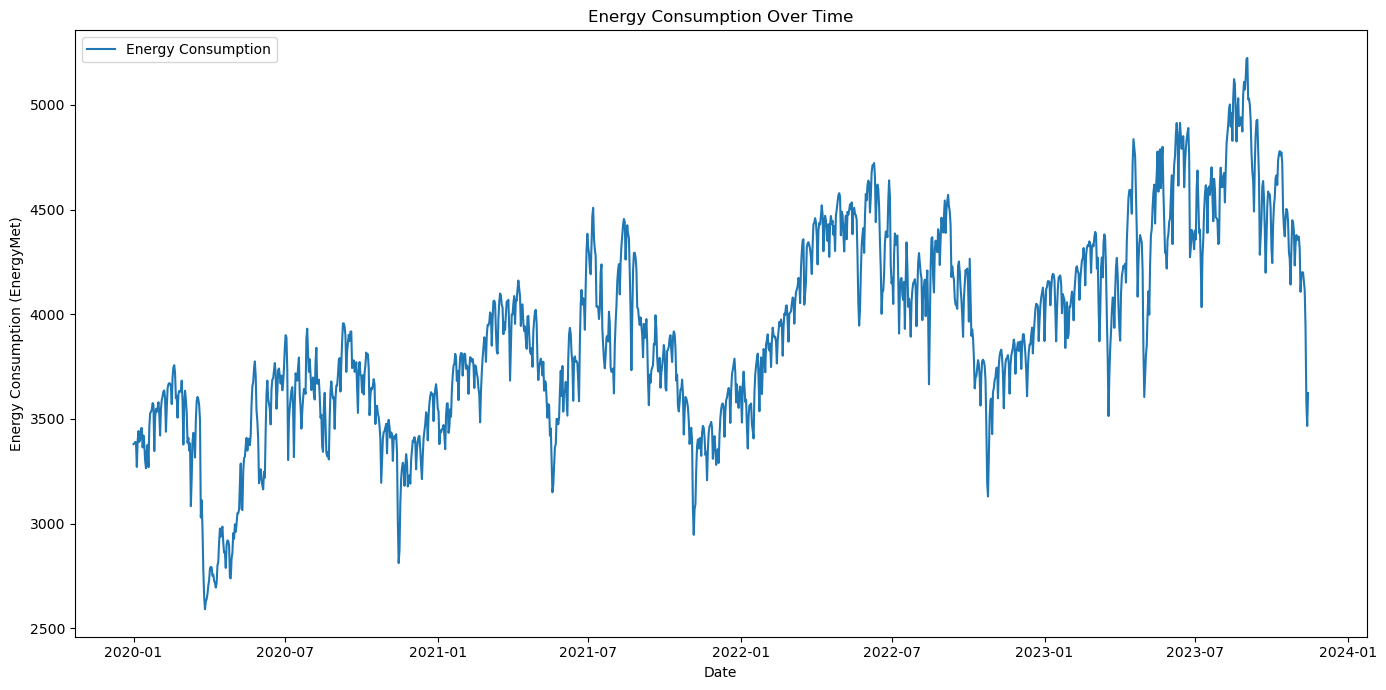

In [12]:
# Correlation Analysis
correlation_matrix = imputed_df.corr()

# Time Series Trends - Plotting Energy Consumption Over Time
plt.figure(figsize=(14, 7))
plt.plot(imputed_df['Date'], imputed_df['EnergyMet'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (EnergyMet)')
plt.legend()
plt.tight_layout()

Text(0.5, 0.98, 'Distribution of Different Energy Sources')

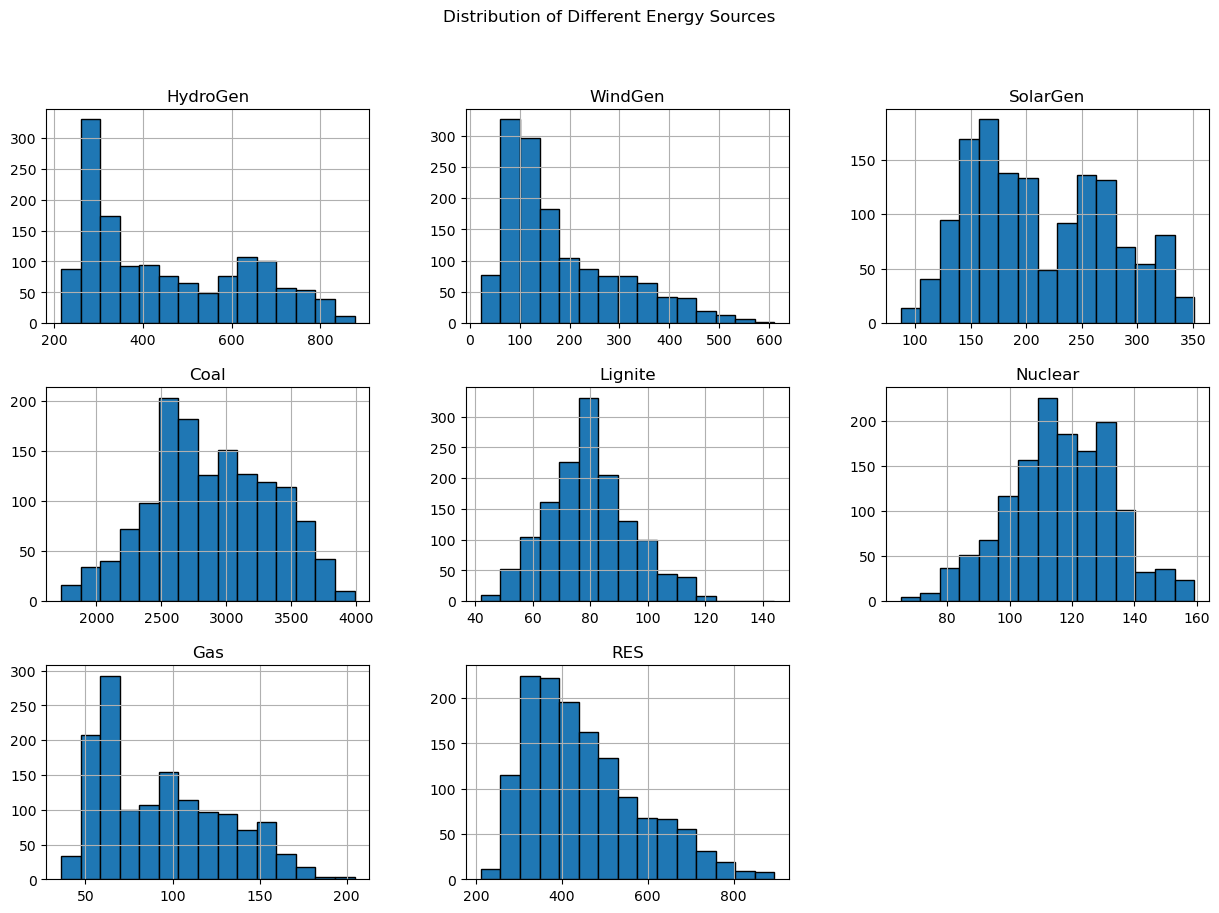

In [13]:
# Distribution Analysis - Histogram of Energy Sources
energy_sources = ['HydroGen', 'WindGen', 'SolarGen', 'Coal', 'Lignite', 'Nuclear', 'Gas', 'RES']
imputed_df[energy_sources].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Distribution of Different Energy Sources')


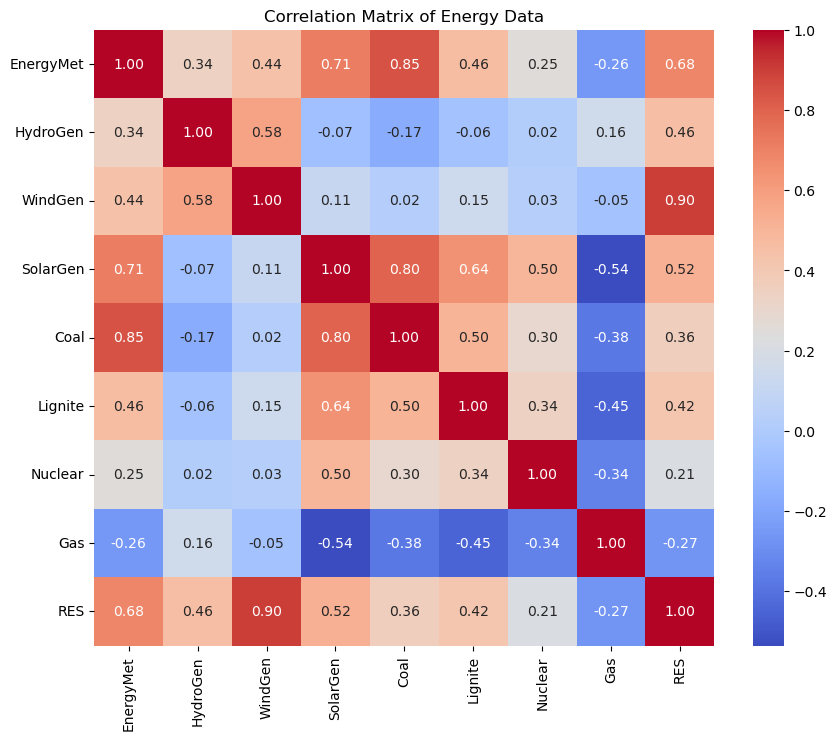

In [14]:
# Visualization - Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Energy Data')

# Show all the plots
plt.show()

In [15]:
correlation_matrix

,EnergyMet,HydroGen,WindGen,SolarGen,Coal,Lignite,Nuclear,Gas,RES
EnergyMet,1.000000,0.338893,0.442012,0.713529,0.846191,0.462078,0.245686,-0.256319,0.682762
HydroGen,0.338893,1.000000,0.576854,-0.066327,-0.168615,-0.055515,0.020956,0.156506,0.455373
WindGen,0.442012,0.576854,1.000000,0.108883,0.023098,0.147695,0.028615,-0.049740,0.899723
SolarGen,0.713529,-0.066327,0.108883,1.000000,0.798578,0.644370,0.497817,-0.535556,0.520307
Coal,0.846191,-0.168615,0.023098,0.798578,1.000000,0.504469,0.295974,-0.376392,0.360784
Lignite,0.462078,-0.055515,0.147695,0.644370,0.504469,1.000000,0.341496,-0.451140,0.415447
Nuclear,0.245686,0.020956,0.028615,0.497817,0.295974,0.341496,1.000000,-0.342738,0.208299
Gas,-0.256319,0.156506,-0.049740,-0.535556,-0.376392,-0.451140,-0.342738,1.000000,-0.270078
RES,0.682762,0.455373,0.899723,0.520307,0.360784,0.415447,0.208299,-0.270078,1.000000


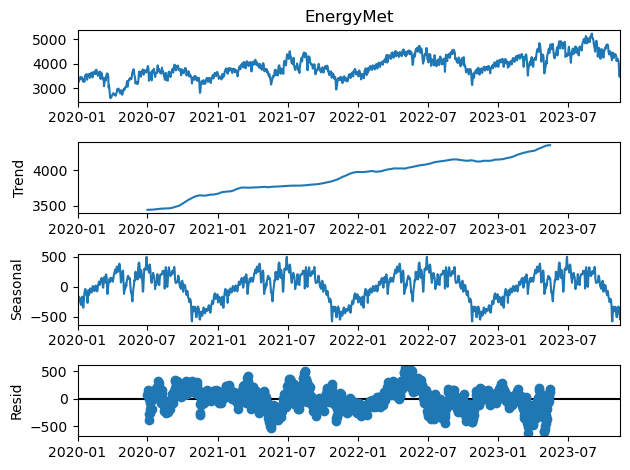

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
imputed_df = pd.read_csv('Final_POSOCO.csv', parse_dates=['Date'])
imputed_df = imputed_df.set_index('Date')

# Assuming 'EnergyMet' is the target variable we want to decompose
# Perform seasonal decomposition on the 'EnergyMet' column
decomposition_results = seasonal_decompose(imputed_df['EnergyMet'], model='additive', period=365)

# Plot the decomposition results
decomposition_fig = decomposition_results.plot()
plt.show()

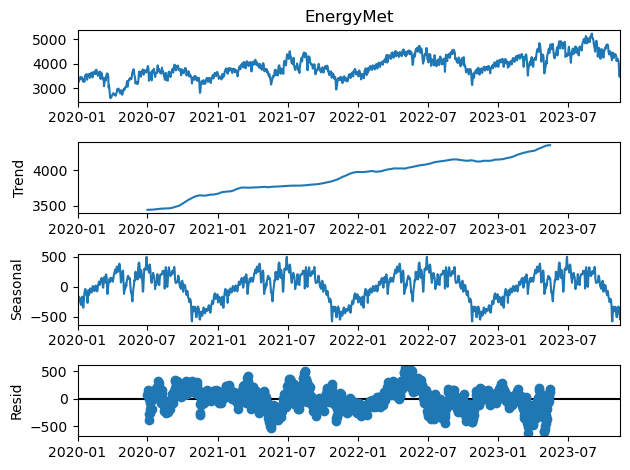

In [17]:
# Choose a frequency for the seasonal decomposition
# For example, if you have daily data and you expect yearly seasonality, you might choose 365
frequency = 365

# Decompose the time series
result = seasonal_decompose(imputed_df['EnergyMet'], model='additive', period=frequency)

# Plot the decomposed components
result.plot()
plt.show()

# You can access the individual components directly as well
trend = result.trend
seasonal = result.seasonal
residual = result.resid

### XGBOOST Modelling

In [18]:
df= pd.read_csv('Final_POSOCO.csv', parse_dates=['Date'])

# Drop the date
df_target = df['EnergyMet']
df_final = df.drop(columns = ['EnergyMet', 'Date'])

In [19]:
df_final.shape

(1414, 8)

In [20]:
df_target.shape

(1414,)

In [21]:
import numpy as np

X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [22]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(1414, 1)

In [23]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [24]:
X_train

array([[739., 187., 165., ...,  87., 124., 403.],
       [322., 118., 166., ..., 119., 137., 331.],
       [395.,  49., 159., ..., 118., 158., 259.],
       ...,
       [606., 425., 167., ..., 128.,  94., 636.],
       [430., 212., 181., ..., 125.,  81., 430.],
       [261.,  95., 202., ..., 107., 100., 350.]], dtype=float32)

### TRAIN XGBOOST USING SAGEMAKER

In [31]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [32]:
train_data.head()

,Target,0,1,2,3,4,5,6,7
0,3918.0,576.0,110.0,205.0,2728.0,76.0,132.0,128.0,354.0
1,3322.0,653.0,210.0,130.0,2090.0,60.0,101.0,137.0,388.0
2,2742.0,363.0,99.0,160.0,1812.0,70.0,115.0,132.0,320.0
3,3686.0,237.0,243.0,173.0,2820.0,80.0,110.0,62.0,472.0
4,4384.0,692.0,273.0,171.0,3003.0,62.0,96.0,126.0,499.0


In [33]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [34]:
val_data.shape

(107, 9)

In [35]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [36]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'energyforecast-teja'
prefix = 'XGBoost'
key= 'XGBoost'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [37]:
print(role)

arn:aws:iam::052828625414:role/service-role/AmazonSageMaker-ExecutionRole-20231205T224814


In [38]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://energyforecast-teja/XGBoost/train/XGBoost


In [39]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://energyforecast-teja/XGBoost/validation/XGBoost


In [40]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://energyforecast-teja/XGBoost/output


In [41]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [42]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [43]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-12-05-20-05-47-413


2023-12-05 20:05:47 Starting - Starting the training job...
2023-12-05 20:06:05 Starting - Preparing the instances for training......
2023-12-05 20:07:18 Downloading - Downloading input data
2023-12-05 20:07:18 Training - Downloading the training image...
2023-12-05 20:07:38 Training - Training image download completed. Training in progress....
2023-12-05 20:08:08 Uploading - Uploading generated training modelINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[20:08:01] 1201x8 matrix with 9608 entries loaded from /opt/ml/input/data

### DEPLOY THE MODEL TO MAKE PREDICTIONS

In [ ]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

In [ ]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer


Xgboost_regressor.serializer = csv_serializer


In [ ]:
X_test.shape()

In [ ]:
# making prediction

predictions = Xgboost_regressor.predict(X_test)

In [ ]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [ ]:
predicted_values = bytes_2_array(predictions)

In [ ]:
predicted_values.shape

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [ ]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Load your dataset (assuming it's in a CSV file)
data = pd.read_csv('Final_POSOCO.csv')

# Filter relevant columns and preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'EnergyMet']]
data = data.set_index('Date')

# Define the short-term and long-term forecasting periods
short_term_window = 30  # 1 month
long_term_window = 6    # 6 months

# Prepare data for training
X_train, y_train = [], []
for i in range(short_term_window, len(data)):
    X_train.append(data.iloc[i - short_term_window:i, 0])
    y_train.append(data.iloc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Train the short-term XGBoost model
short_term_model = xgb.XGBRegressor(n_estimators=100, max_depth=5)
short_term_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
# Initialize data for the short-term forecast (December 2023)
initial_month = 12
initial_year = 2023
short_term_forecast = []

# Prepare data for predicting short-term (1-month) values
X_future_short_term = data.iloc[-short_term_window:].values.reshape(1, -1)  # Next 1 month data

# Make predictions for short-term (December) forecast
short_term_forecast.append(short_term_model.predict(X_future_short_term)[0])

# Initialize data for the long-term forecast starting from January 2024
initial_month = 1
initial_year = 2024
long_term_forecast = []

# Generate the long-term forecast for the next 6 months
for _ in range(long_term_window):
    long_term_prediction = short_term_model.predict(X_train[-short_term_window:])
    long_term_forecast.append(long_term_prediction[0])
    # Update the input data by appending the prediction and removing the oldest value
    X_train = np.roll(X_train, shift=-1)
    X_train[-1, -1] = long_term_prediction[0]

# Create lists of full month names for short-term and long-term forecasts
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a DataFrame for the short-term (December) forecast
short_term_forecast_df = pd.DataFrame({'Month': ['December'], 'EnergyMet': short_term_forecast})

# Create a DataFrame for the long-term forecast (January - June 2024)
long_term_forecast_df = pd.DataFrame({'Month': [months[(initial_month + i - 1) % 12] for i in range(long_term_window)], 'EnergyMet': long_term_forecast})

# Display the short-term and long-term forecasts
print("Short-term forecast (December 2023):")
short_term_forecast_df



Short-term forecast (December 2023):


,Month,EnergyMet
0,December,3715.451904


In [34]:
print("\nLong-term forecast (January - June 2024):")
long_term_forecast_df


Long-term forecast (January - June 2024):


,Month,EnergyMet
0,January,4563.676270
1,February,4608.943359
2,March,4575.875977
3,April,4588.594238
4,May,4749.590332
5,June,4775.526367


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset into training and testing sets
X = np.array([data.iloc[i - short_term_window:i, 0] for i in range(short_term_window, len(data))])
y = data.iloc[short_term_window:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
short_term_model = xgb.XGBRegressor(n_estimators=100, max_depth=5)
short_term_model.fit(X_train, y_train)

# Predict on the test set
y_pred = short_term_model.predict(X_test)

# Calculate the performance metrics
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
}

# Creating a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics, index=['XGBoost'])

# Display the DataFrame
metrics_df

,MAE,MSE,RMSE
XGBoost,75.455047,9725.673301,98.618828


In [ ]:
#LSTM

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the dataset
data = pd.read_csv('Final_POSOCO.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'EnergyMet']].set_index('Date')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30  # Use 30 days to predict the next day
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=20, batch_size=32, verbose=2)

# Short-term forecast (December 2023)
last_30_days = scaled_data[-look_back:]
X_short_term = np.reshape(last_30_days, (1, look_back, 1))
short_term_forecast_scaled = model.predict(X_short_term)
short_term_forecast = scaler.inverse_transform(short_term_forecast_scaled)[0, 0]

# Long-term forecast (January - June 2024)
long_term_forecast = []
current_batch = last_30_days.copy()

for i in range(6):  # 6 months
    current_pred_scaled = model.predict(np.reshape(current_batch, (1, look_back, 1)))
    long_term_forecast.append(scaler.inverse_transform(current_pred_scaled)[0, 0])
    current_batch = np.append(current_batch[1:], current_pred_scaled, axis=0)

# Convert forecasts to DataFrame
short_term_forecast_df = pd.DataFrame({'Month': ['December'], 'EnergyMet': [short_term_forecast]})
long_term_forecast_df = pd.DataFrame({'Month': ['January', 'February', 'March', 'April', 'May', 'June'], 'EnergyMet': long_term_forecast})

# Display the forecasts
print("Short-term forecast (December 2023):")
short_term_forecast_df

Epoch 1/20
44/44 - 2s - loss: 0.0375 - 2s/epoch - 51ms/step
Epoch 2/20
44/44 - 1s - loss: 0.0048 - 633ms/epoch - 14ms/step
Epoch 3/20
44/44 - 1s - loss: 0.0043 - 618ms/epoch - 14ms/step
Epoch 4/20
44/44 - 0s - loss: 0.0042 - 469ms/epoch - 11ms/step
Epoch 5/20
44/44 - 1s - loss: 0.0040 - 637ms/epoch - 14ms/step
Epoch 6/20
44/44 - 1s - loss: 0.0038 - 727ms/epoch - 17ms/step
Epoch 7/20
44/44 - 1s - loss: 0.0039 - 741ms/epoch - 17ms/step
Epoch 8/20
44/44 - 1s - loss: 0.0039 - 549ms/epoch - 12ms/step
Epoch 9/20
44/44 - 1s - loss: 0.0036 - 574ms/epoch - 13ms/step
Epoch 10/20
44/44 - 1s - loss: 0.0035 - 612ms/epoch - 14ms/step
Epoch 11/20
44/44 - 0s - loss: 0.0034 - 477ms/epoch - 11ms/step
Epoch 12/20
44/44 - 0s - loss: 0.0033 - 485ms/epoch - 11ms/step
Epoch 13/20
44/44 - 1s - loss: 0.0033 - 503ms/epoch - 11ms/step
Epoch 14/20
44/44 - 0s - loss: 0.0032 - 460ms/epoch - 10ms/step
Epoch 15/20
44/44 - 0s - loss: 0.0032 - 458ms/epoch - 10ms/step
Epoch 16/20
44/44 - 0s - loss: 0.0030 - 471ms/epoch 

,Month,EnergyMet
0,December,3766.134766


In [38]:
print("\nLong-term forecast (January - June 2024):")
long_term_forecast_df


Long-term forecast (January - June 2024):


,Month,EnergyMet
0,January,3766.134766
1,February,3743.346924
2,March,3727.887207
3,April,3719.914062
4,May,3717.228760
5,June,3718.109863


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a test set (X_test, y_test)
# For demonstration, let's create a test set from the last part of your data
test_size = 60  # For example, last 60 days
X_test, y_test = create_dataset(scaled_data[-(test_size + look_back):], look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform([y_test])

# Calculate performance metrics
mae = mean_absolute_error(y_actual[0], y_pred[:, 0])
mse = mean_squared_error(y_actual[0], y_pred[:, 0])
rmse = np.sqrt(mse)

# Append these metrics to the existing DataFrame
new_metrics_df = pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]}, index=['LSTM'])
metrics_df = metrics_df.append(new_metrics_df)

# Display the updated DataFrame
metrics_df


2/2 [==============================] - 0s 9ms/step


C:\Users\tejas\AppData\Local\Temp\ipykernel_21120\2083694110.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(new_metrics_df)


,MAE,MSE,RMSE
XGBoost,75.455047,9725.673301,98.618828
LSTM,131.887376,30768.275902,175.408882


In [ ]:
#SARIMAX

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset
data = pd.read_csv('Final_POSOCO.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Assuming 'EnergyMet' is your target and all other columns are exogenous
y = data['EnergyMet']
#exog = data.drop('EnergyMet', axis=1)

# Fill any missing values in exogenous variables
#exog = exog.fillna(method='ffill')  # Forward fill for simplicity

# Define and fit the SARIMAX model
# Note: You might need to adjust the order and seasonal_order parameters
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Short-term forecast (1 month ahead)
# For exogenous variables, use the last known values (assumption)
exog_forecast = exog.iloc[-1:].values  # Last row extended for 1 month
short_term_forecast = results.get_forecast(steps=1, exog=exog_forecast).predicted_mean

# Long-term forecast (6 months ahead)
# Repeating the last known exogenous variables for 6 months (assumption)
exog_forecast = np.tile(exog.iloc[-1:].values, (6, 1))  # Repeat last row for 6 months
long_term_forecast = results.get_forecast(steps=6, exog=exog_forecast).predicted_mean

# Convert forecasts to DataFrame
short_term_forecast_df = pd.DataFrame({'Month': ['December'], 'EnergyMet': short_term_forecast.values})
long_term_forecast_df = pd.DataFrame({'Month': ['January', 'February', 'March', 'April', 'May', 'June'], 'EnergyMet': long_term_forecast.values})




C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [46]:
# Display the forecasts
print("Short-term forecast (December 2023):")
short_term_forecast_df

Short-term forecast (December 2023):


,Month,EnergyMet
0,December,3661.095677


In [47]:
print("\nLong-term forecast (January - June 2024):")
long_term_forecast_df


Long-term forecast (January - June 2024):


,Month,EnergyMet
0,January,3661.095677
1,February,3645.256965
2,March,3683.109846
3,April,3666.997496
4,May,3679.488639
5,June,3680.371992


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the dataset into training and testing sets
# Let's assume the last 'n' observations are for testing
n_test = 60
train = data.iloc[:-n_test]
test = data.iloc[-n_test:]

# Fit the SARIMAX model on training data
model = SARIMAX(train['EnergyMet'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # exog=train.drop('EnergyMet', axis=1)
results = model.fit()

# Predict on the test set
exog_test = test.drop('EnergyMet', axis=1)
predictions = results.get_forecast(steps=n_test, exog=exog_test).predicted_mean

# Calculate performance metrics
mae = mean_absolute_error(test['EnergyMet'], predictions)
mse = mean_squared_error(test['EnergyMet'], predictions)
rmse = np.sqrt(mse)

# Append these metrics to the existing DataFrame
sarimax_metrics_df = pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]}, index=['SARIMAX'])
metrics_df = metrics_df.append(sarimax_metrics_df)


# Display the updated DataFrame
metrics_df

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tejas\AppData\Local\Temp\ipykernel_21120\2531844890.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(sarimax_metrics_df)


,MAE,MSE,RMSE
XGBoost,75.455047,9725.673301,98.618828
LSTM,131.887376,30768.275902,175.408882
SARIMAX,514.821472,342802.528450,585.493406
